In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

In [41]:
adult_df = pd.read_csv('./adult.csv', sep=',')
print("Kích thước của bộ dữ liệu là:", adult_df.shape)
adult_df.head()

Kích thước của bộ dữ liệu là: (32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [42]:
print("Kiểu dữ liệu của các thuộc tính: ")
adult_df.dtypes

Kiểu dữ liệu của các thuộc tính: 


age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [43]:
adult_df = adult_df.replace("?", 0)

In [44]:
def count_zero(vals):
    res = 0
    for val in vals:
        res += (val == 0)
    return res

In [45]:
for col in adult_df.columns:
    if adult_df[col].dtype == 'object':
        vals = adult_df[col].value_counts().index.tolist()
        if (0 in vals):
            print(f'Cột "{col}" có {len(vals)} giá trị khác nhau và bao gồm {count_zero(adult_df[col])} giá trị 0')
        else:
            print(f'Cột "{col}" có {len(vals)} giá trị khác nhau và "không" bao gồm giá trị 0')

Cột "workclass" có 9 giá trị khác nhau và bao gồm 1836 giá trị 0
Cột "education" có 16 giá trị khác nhau và "không" bao gồm giá trị 0
Cột "marital.status" có 7 giá trị khác nhau và "không" bao gồm giá trị 0
Cột "occupation" có 15 giá trị khác nhau và bao gồm 1843 giá trị 0
Cột "relationship" có 6 giá trị khác nhau và "không" bao gồm giá trị 0
Cột "race" có 5 giá trị khác nhau và "không" bao gồm giá trị 0
Cột "sex" có 2 giá trị khác nhau và "không" bao gồm giá trị 0
Cột "native.country" có 42 giá trị khác nhau và bao gồm 583 giá trị 0
Cột "income" có 2 giá trị khác nhau và "không" bao gồm giá trị 0


In [46]:
no_samples = adult_df.shape[0]

In [47]:
adult_df = adult_df[adult_df["workclass"] != 0]
adult_df = adult_df[adult_df["native.country"] != 0]
adult_df = adult_df[adult_df["occupation"] != 0]

In [48]:
no_samples_after_remove_zero = adult_df.shape[0]

In [49]:
print(f'Đã loại bỏ {no_samples - no_samples_after_remove_zero} hàng')

Đã loại bỏ 2399 hàng


In [50]:
adult_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


<AxesSubplot:>

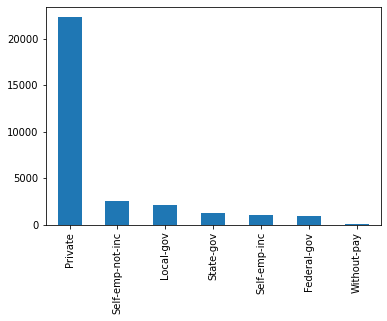

In [51]:
adult_df["workclass"].value_counts().plot(kind='bar')

<AxesSubplot:>

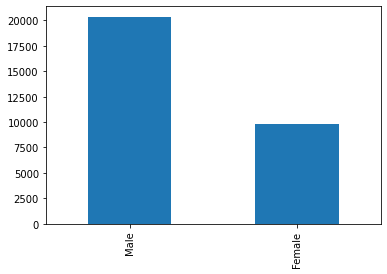

In [52]:
adult_df["sex"].value_counts().plot(kind='bar')

<AxesSubplot:>

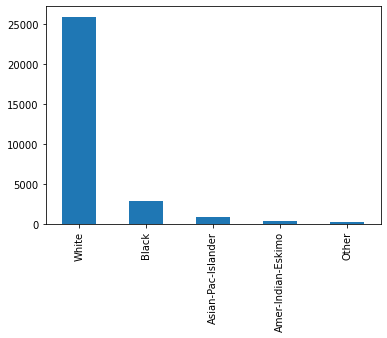

In [53]:
adult_df["race"].value_counts().plot(kind='bar')

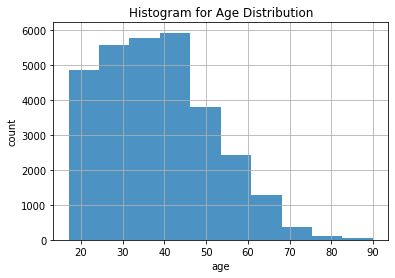

In [54]:
plt.hist(adult_df["age"], bins = 10, alpha=0.8)
plt.xlabel("age")
plt.ylabel("count")
plt.title("Histogram for Age Distribution")
plt.grid(True)

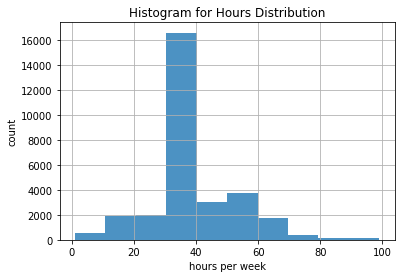

In [55]:
plt.hist(adult_df["hours.per.week"], bins = 10, alpha=0.8)
plt.xlabel("hours per week")
plt.ylabel("count")
plt.title("Histogram for Hours Distribution")
plt.grid(True)

In [56]:
categorical_input_cols = []
for col in adult_df.columns[:-1]:
    if adult_df[col].dtype == 'object':
        categorical_input_cols.append(col)

adult_data_df = pd.get_dummies(adult_df[categorical_input_cols])

In [57]:
adult_target_df = pd.get_dummies(adult_df['income']).drop(columns = '<=50K')    

In [58]:
adult_data_arr = adult_data_df.to_numpy()
adult_target_arr = np.array(adult_target_df).reshape(adult_target_df.shape[0])

In [59]:
print(f'Bộ dữ liệu có {adult_target_arr.shape[0]} mẫu')

Bộ dữ liệu có 30162 mẫu


In [60]:
adult_train = {
    'data': adult_data_arr[:20000],
    'target': adult_target_arr[:20000]
}

adult_test = {
    'data': adult_data_arr[20000:],
    'target': adult_target_arr[20000:]
}

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
from tqdm import tqdm
scores = []
max_score = 0
optimal_min_samples_split = adult_data_arr.shape[0]
for quantity in tqdm(range(40, 500, 10)):
    decision_tree_clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split = quantity, max_depth = 8)
    cv_scores = cross_val_score(decision_tree_clf, adult_data_arr, adult_target_arr, cv=3)
    score = np.array(cv_scores).mean()
    scores.append(score)   
    if max_score < score:
        max_score = score
        optimal_min_samples_split = quantity

100%|██████████| 46/46 [00:46<00:00,  1.02s/it]


Text(0.5, 0, 'Number of min samples split')

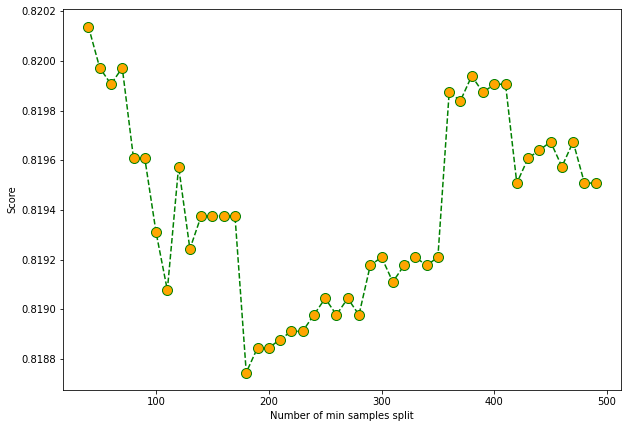

In [63]:
plt.figure(figsize=(10, 7))
plt.plot(range(40, 500, 10), scores, color="green", linestyle="dashed", marker="o", markerfacecolor="orange", markersize=10)
plt.ylabel("Score")
plt.xlabel("Number of min samples split")

In [64]:
optimal_min_samples_split

40

In [65]:
decision_tree_clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split = optimal_min_samples_split, max_depth = 8)
decision_tree_clf.fit(adult_train['data'], adult_train['target'])
y_pred = decision_tree_clf.predict(adult_test['data'])
print("Test Score:", decision_tree_clf.score(adult_test['data'], adult_test['target']))
print("Train Score:", decision_tree_clf.score(adult_train['data'], adult_train['target']))

Test Score: 0.8370399527652037
Train Score: 0.81825


In [66]:
from sklearn.tree import export_graphviz
decision_tree_clf.fit(adult_train['data'], adult_train['target'])
export_graphviz(decision_tree_clf, out_file='adult_tree.dot', feature_names=adult_data_df.columns)